In [31]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [32]:
# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [33]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('steam-locomotive.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)

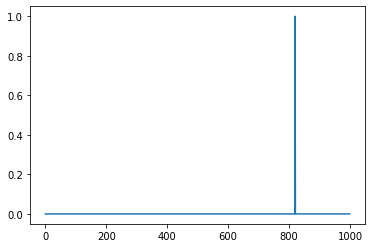

820


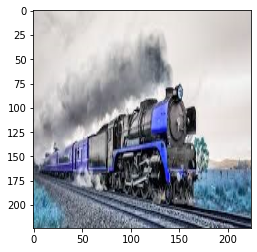

In [34]:
# predict
out = model.predict(im)
plt.plot(out.ravel())
plt.show()
print(np.argmax(out))
#this should print 820 for steaming train
# the labels can be checked from https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
plt.imshow(im.reshape(224, 224, 3), interpolation='nearest') # displaying the image
plt.show()

#### In the plot you can show that the other classes have really low support as compared to the exact class, means the prediction has very low loss

In [35]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('cat.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)

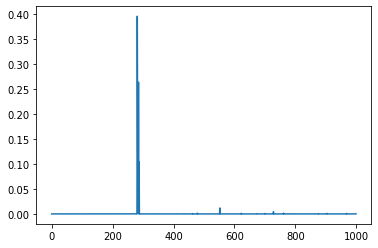

281


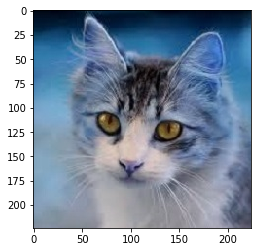

In [36]:
# predict
out = model.predict(im)
plt.plot(out.ravel())
plt.show()
print(np.argmax(out))
# the labels can be checked from https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
plt.imshow(im.reshape(224, 224, 3), interpolation='nearest') # displaying the image
plt.show()

#### Here the plot represents spikes for two different classes if you look closely. It's because the nearby class is also a diffrent breed of cats if you check in the list of the lables at https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

#### Recycling pre-built deep learning models for extracting features

In [37]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [38]:
# pre-built and pre-trained deep learning VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
for i, layer in enumerate(base_model.layers):
    print (i, layer.name, layer.output_shape)

0 input_5 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [39]:
# extract features from block4_pool block
model = Model(input=base_model.input, output=base_model.get_layer('block4_pool').output)
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

c:\users\saket.kumar\.conda\envs\new_py\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [40]:
# get the features from this block
features = model.predict(x)

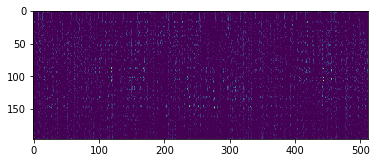

In [41]:
plt.imshow(features.reshape(196, 512), interpolation='nearest')
plt.show()